Script to clean the dataset

In [7]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load data (files must be uploaded first)
news = pd.read_csv("News_Opinion Articles - News.csv")
opinion = pd.read_csv("News_Opinion Articles - Opinion.csv")

news = news[['title', 'section']]
opinion = opinion[['title', 'section']]

df = pd.concat([news, opinion], ignore_index=True)

# Clean titles
def clean_title(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_title'] = df['title'].apply(clean_title)
df['tokens'] = df['clean_title'].str.split()

# Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['tokens'] = df['tokens'].apply(
    lambda words: [w for w in words if w not in stop_words]
)

# Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

df['tokens'] = df['tokens'].apply(
    lambda words: [lemmatizer.lemmatize(w) for w in words]
)

# Save cleaned CSVs
news_clean = df[df['section'] == 'News'].copy()
opinion_clean = df[df['section'] == 'Opinion'].copy()

news_clean.to_csv("News_cleaned.csv", index=False)
opinion_clean.to_csv("Opinion_cleaned.csv", index=False)

print("Saved files:")
print(" - News_cleaned.csv")
print(" - Opinion_cleaned.csv")


Saved files:
 - News_cleaned.csv
 - Opinion_cleaned.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Script to extract the top 10 words for opinion and news

In [8]:
import pandas as pd
from collections import Counter
from itertools import chain
import ast  # safely converts string -> list

news = pd.read_csv("News_cleaned.csv")
opinion = pd.read_csv("Opinion_cleaned.csv")

news['tokens'] = news['tokens'].apply(ast.literal_eval)
opinion['tokens'] = opinion['tokens'].apply(ast.literal_eval)

df = pd.concat([news, opinion], ignore_index=True)

news_words = list(chain.from_iterable(df[df['section'] == 'News']['tokens']))
opinion_words = list(chain.from_iterable(df[df['section'] == 'Opinion']['tokens']))

news_freq = Counter(news_words)
opinion_freq = Counter(opinion_words)

print("Top 10 News words:")
print(news_freq.most_common(10))

print("\nTop 10 Opinion words:")
print(opinion_freq.most_common(10))




Top 10 News words:
[('student', 191), ('uva', 105), ('committee', 100), ('university', 93), ('council', 65), ('board', 63), ('honor', 58), ('new', 53), ('discusses', 48), ('archive', 48)]

Top 10 Opinion words:
[('editorial', 57), ('uva', 43), ('student', 37), ('parting', 23), ('shot', 23), ('virginia', 23), ('must', 21), ('letter', 19), ('university', 17), ('kurtzweil', 17)]


EDA Plots

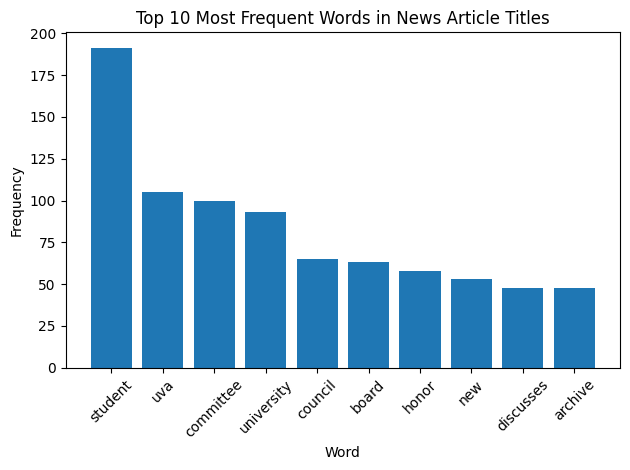

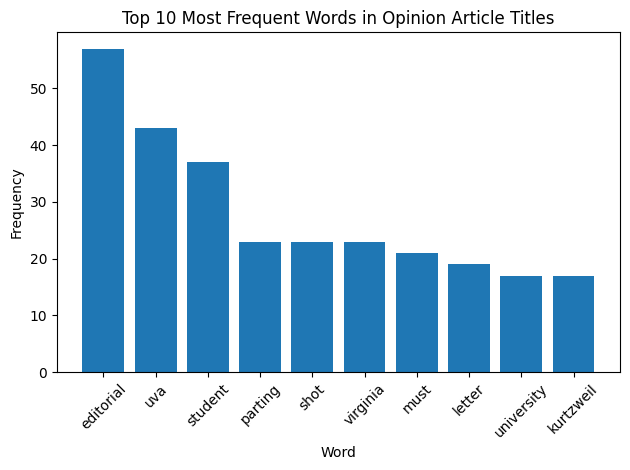

In [9]:

import matplotlib.pyplot as plt

# ---- Plot 1: News ----
words, counts = zip(*news_freq.most_common(10))
plt.figure()
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words in News Article Titles")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ---- Plot 2: Opinion ----
words, counts = zip(*opinion_freq.most_common(10))
plt.figure()
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words in Opinion Article Titles")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Analysis

In [12]:
import pandas as pd
import ast
from collections import Counter
from itertools import chain
from scipy.stats import chi2_contingency

news = pd.read_csv("News_cleaned.csv")
opinion = pd.read_csv("Opinion_cleaned.csv")

news['tokens'] = news['tokens'].apply(ast.literal_eval)
opinion['tokens'] = opinion['tokens'].apply(ast.literal_eval)

news_words = list(chain.from_iterable(news['tokens']))
opinion_words = list(chain.from_iterable(opinion['tokens']))

news_freq = Counter(news_words)
opinion_freq = Counter(opinion_words)

combined_freq = news_freq + opinion_freq
top_words = [word for word, _ in combined_freq.most_common(25)]
print(top_words)

table = []

for word in top_words:
    table.append([
        news_freq.get(word, 0),
        opinion_freq.get(word, 0)
    ])

contingency_df = pd.DataFrame(
    table,
    index=top_words,
    columns=["News", "Opinion"]
)

contingency_df

chi2, p, dof, expected = chi2_contingency(contingency_df)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.6f}")



['student', 'uva', 'university', 'committee', 'council', 'board', 'honor', 'new', 'editorial', 'president', 'virginia', 'discusses', 'archive', 'faculty', 'visitor', 'ground', 'uvas', 'shot', 'presidential', 'health', 'senate', 'approves', 'election', 'letter', 'resignation']
Chi-square statistic: 432.16
Degrees of freedom: 24
P-value: 0.000000
